In [1]:
# Importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Loading the dataset in dataframe using python
df=pd.read_csv("Fraud_loan_data.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
# shape of the data
df.shape

(614, 13)

In [4]:
# data types
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
# dataset columns
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Now, the summary shows that the variables  Gender,Married ,Self_Employed,  Dependents,LoanAmount,Loan_Amount_Term,Credit_History contain missing values. 
Some of these variables are categorical data type and some are numerical data type.So, I will impute the missing values
of categorical data type with the most frequent value- the mode and the missing valuesof numerical data type with the 
mean value. 

# Summary Statistics

In [7]:
# Summary of numerical variables of the dataset
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
# Getting the unique value and their frequency of variable Property_Area
df["Property_Area"].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

# Exploratory Data Analysis

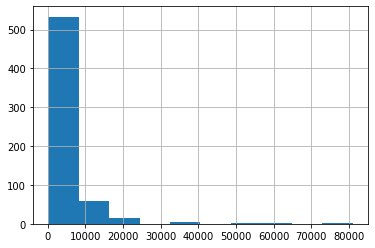

In [9]:
# Histogram of variable ApplicantIncome

df["ApplicantIncome"].hist()

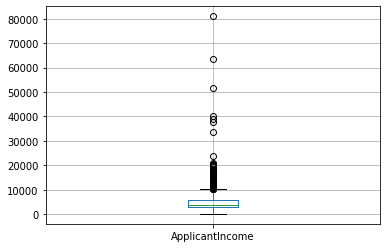

In [10]:
#Box plot for ApplicantIncome

df.boxplot(column="ApplicantIncome")

 The above box plot confirms the presence of a lot of outliers/extreme values.This can be attributed to the income
 disparity in the society

 We can see here that there is no substantial difference between the mean income of graduates and non-graduates.But there are
high number of graduates with very high incomes ,which are appearing to be the outliers

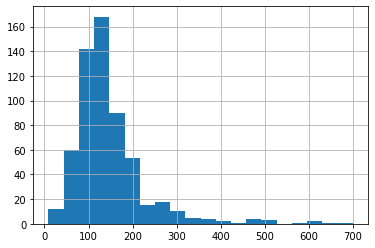

In [12]:
df["LoanAmount"].hist(bins=20)

#Extreme values because some people might apply for high value loans due to specific needs

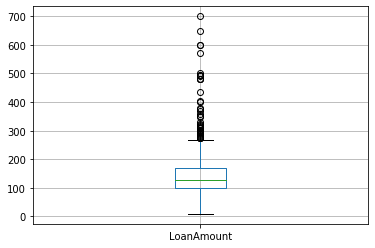

In [13]:
#Box plot of variable LoanAmount 
df.boxplot(column="LoanAmount")

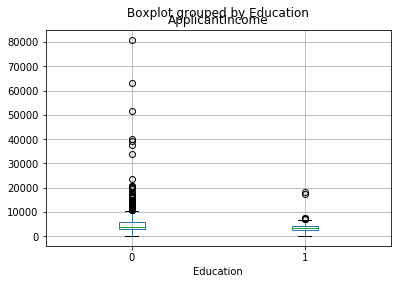

In [61]:
# Box plot of ApplicantIncome by Education
df.boxplot(column="ApplicantIncome",by="Education")

Above Box plot suggest that even though mean income of graduates and non-graduates are same are there some graduates with
very high income which are appearing as a outlier here

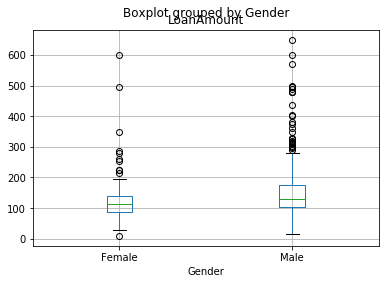

In [14]:
#Box plot of variable LoanAmount by variable Gender 
df.boxplot(column="LoanAmount",by="Gender")

 Loan amount has extreme as well as missing values where as Applicant income has extreme values only

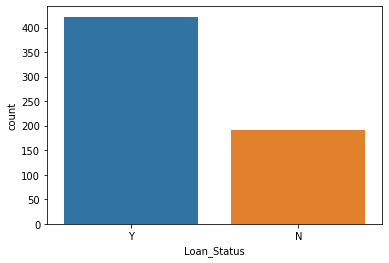

In [15]:
# countplot for Loan Status
sns.countplot(df["Loan_Status"])

above graph suggest that there are more no. of people whose loan got approved where as only few people are there whose loan 
got rejected

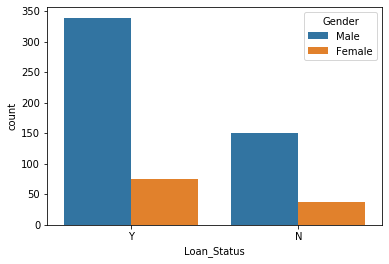

In [16]:
# plotting the count plot for Loan Status differentiating them on the basis of their Gender
sns.countplot(df["Loan_Status"],hue="Gender",data=df)

Above graph suggest that loans of males got approved when compared to females

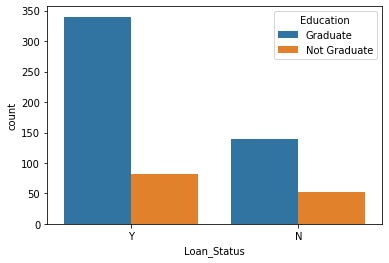

In [17]:
# plotting the count plot for Loan Status differentiating them on the basis of their Education
sns.countplot(df["Loan_Status"],hue="Education",data=df)

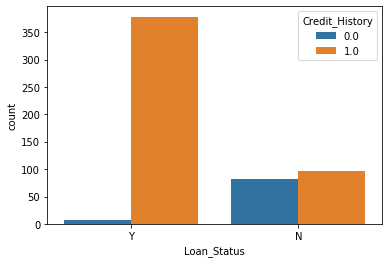

In [18]:
# plotting the count plot for Loan Status differentiating them on the basis of their credit history
sns.countplot(df["Loan_Status"],hue="Credit_History",data=df)

above graph suggest that loan of people with credit history 1 got approved easily when compared to people of credit history 0

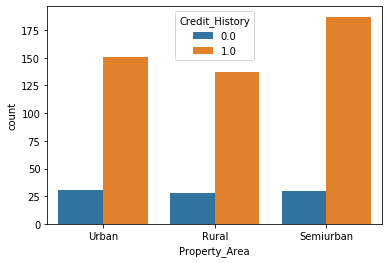

In [19]:
# plotting the countplot of Property area differentiating them on the basis of their credit history
sns.countplot(df["Property_Area"],hue="Credit_History",data=df)

above graph suggest that more no. of people living in Semiurban and Urban area are having good credit history when compared
to people of Rural Areas

In [20]:
# Loan approval rates in absolute numbers

loan_approval = df["Loan_Status"].value_counts()['Y']

print(loan_approval)

422


i.e. 422 no. of loans were approved

In [21]:
# Credit History and Loan Status

pd.crosstab(df["Credit_History"],df["Loan_Status"],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [22]:
# Defining function to output percentage row wise in a cross table

def percentageConvert(x):
    return x/float(x[-1])

In [23]:
# Loan approval rate for customer having credit history (1)

df_n=pd.crosstab(df["Credit_History"],df["Loan_Status"],margins=True).apply(percentageConvert,axis=1)

In [24]:
loan_approval_with_credit_1= df_n['Y'][1]

print(loan_approval_with_credit_1*100)

79.57894736842105


i.e. 79.58% of applicants whose loans were approved have credit_History equals to 1

In [25]:
df_n['Y']

Credit_History
0.0    0.078652
1.0    0.795789
All    0.682624
Name: Y, dtype: float64

In [26]:
# checking for null values
df.isnull().sum()                                   

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

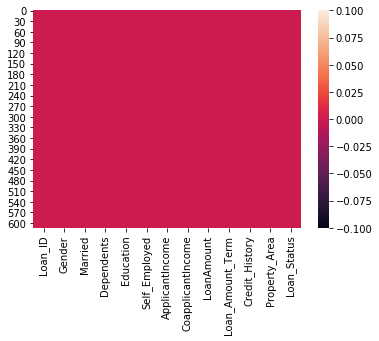

In [65]:
# visualising null values using heatmap

sns.heatmap(df.isnull())

# Data Preparation for Model Building

In [28]:
# imputing the missing values of categorical data type with the most frequent value- the mode 
imp= SimpleImputer(strategy="most_frequent")

for column in df.columns:
    if df[column].dtype == object:
        df[column]=imp.fit_transform(df[column].values.reshape(-1,1))
  

In [29]:
# imputing the missing values of numerical data type with the mean value
imp= SimpleImputer(strategy="mean")

for column in df.columns:
    if df[column].dtype == "float64":
        df[column]=imp.fit_transform(df[column].values.reshape(-1,1))
  

In [ ]:
# # checking for null values again

In [30]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

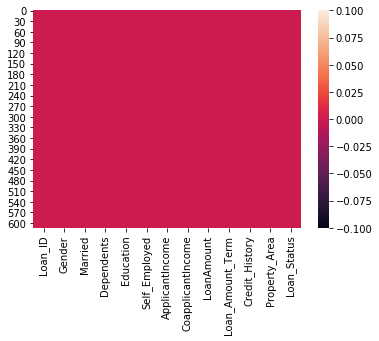

In [32]:
sns.heatmap(df.isnull())

above heatmap suggest that there are no null values in our dataset now

In [33]:
# Using LabelEncoder converting the labels into numeric form so as to convert it into the machine-readable form.
le= LabelEncoder()

for column in df.columns:
    if df[column].dtype == object:
        df[column]=le.fit_transform(df[column])

In [34]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [35]:
# checking data types again
df.dtypes

Loan_ID                int32
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

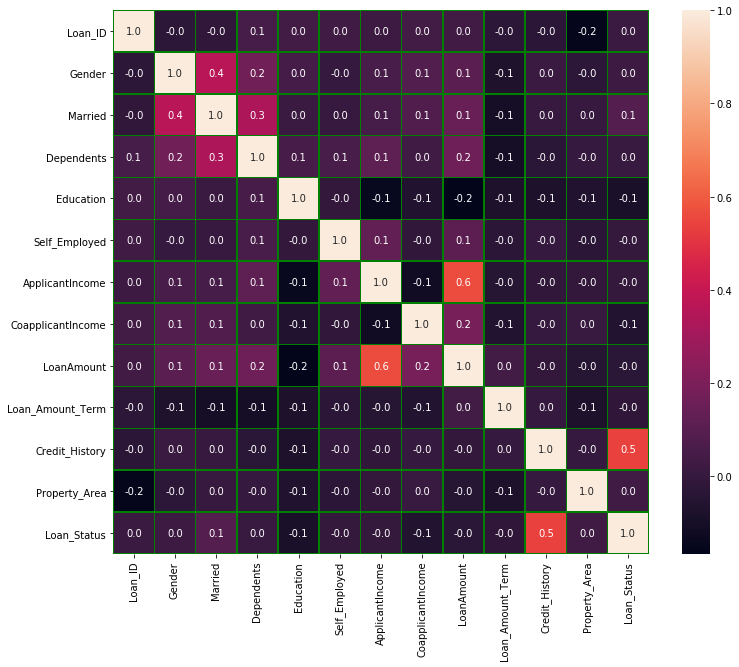

In [62]:
# Checking correlation using heatmap
f,ax=plt.subplots(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor="green",fmt=".1f",ax=ax)
plt.show()

 Above graph shows that there is good correlation between Loan_Status and Credit History i.e. whether a person would get loan or not depends very much on his/her credit history

In [37]:
#Splitting the dependent and independent variables here
df_x=df.drop("Loan_Status",axis=1)
y=df["Loan_Status"]

In [38]:
#scaling the input variables
scale = StandardScaler()

sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=45,test_size=0.2)

In [40]:
# creating object files of all algorithms
KNN = KNeighborsClassifier(n_neighbors=6)
SV = SVC()
DT = DecisionTreeClassifier()
LR = LogisticRegression()
GNB = GaussianNB()

In [41]:
# appending all models in an empty list 
models = []
models.append(("KNeighborsClassifier",KNN))
models.append(("SVC",SV))
models.append(("DecisionTreeClassifier",DT))
models.append(("LogisticRegression",LR))
models.append(("GaussianNB",GNB))

*************************************** KNeighborsClassifier ***************************************************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')


Accuracy score= 0.7560975609756098


Cross_Val_score= 0.7641459545214172


roc_auc_score= 0.6807692307692308


classification_report
               precision    recall  f1-score   support

           0       0.86      0.40      0.55        45
           1       0.74      0.96      0.83        78

    accuracy                           0.76       123
   macro avg       0.80      0.68      0.69       123
weighted avg       0.78      0.76      0.73       123



[[18 27]
 [ 3 75]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*************************************** SVC ***************************************************


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef

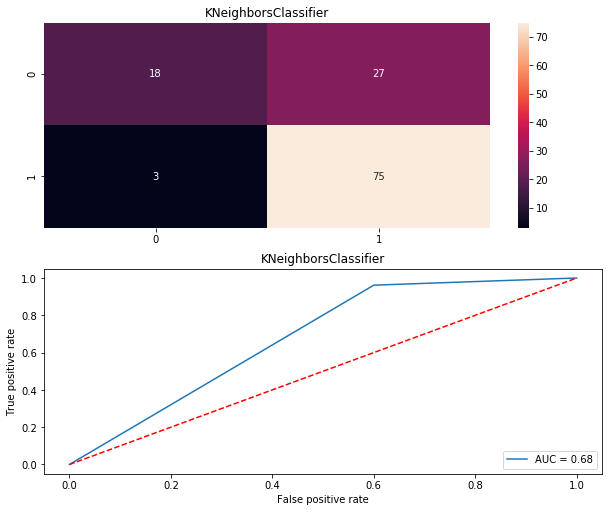

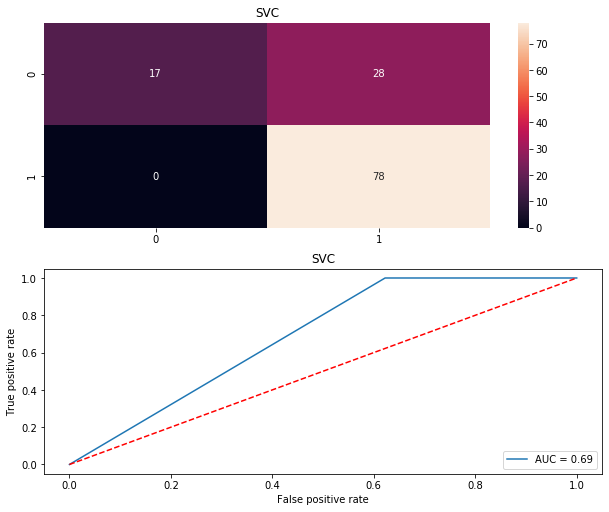

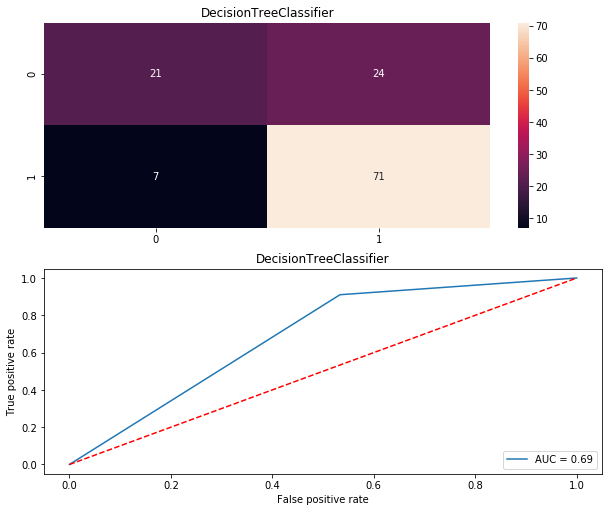

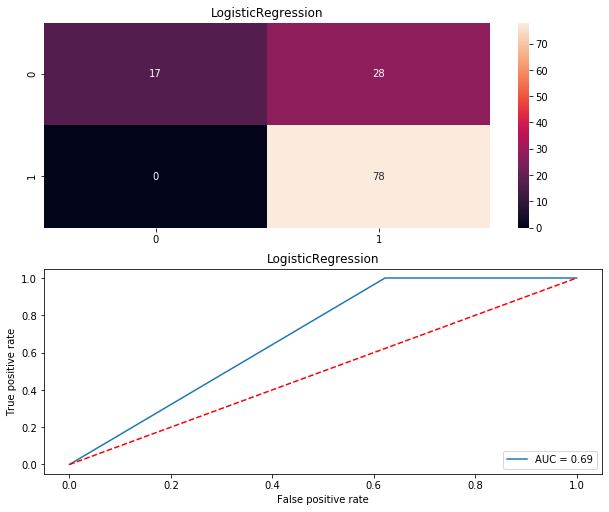

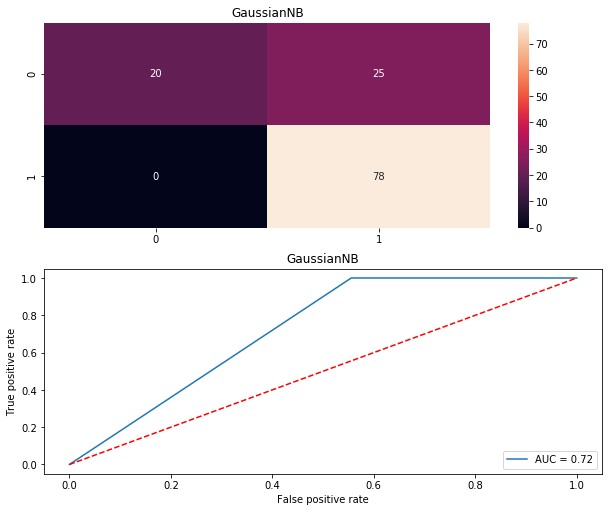

In [42]:
# Now using for loop we are calculating each and every parameter in a single cell
Model = []
score = []
cvs = []
rocscore = []

for name,model in models:
    print("***************************************",name,"***************************************************")
    print("\n")
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print("\n")
    AS=accuracy_score(y_test,pre)
    print("Accuracy score=",AS)
    score.append(AS*100)
    print("\n")
    sc=cross_val_score(model,x,y,cv=10,scoring="accuracy").mean()
    print("Cross_Val_score=",sc)
    cvs.append(sc*100)
    print("\n")
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print("roc_auc_score=",roc_auc)
    rocscore.append(roc_auc*100)
    print("\n")
    print("classification_report\n",classification_report(y_test,pre))
    print("\n")
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print("\n")
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel("True positive rate")
    plt.xlabel("False positive rate")
    print("\n\n")

In [43]:
# printing all  results obtained above in a dataframe
result=pd.DataFrame({"Model":Model,"Accuracy_score":score,"Cross_val_score":cvs,"Roc_auc_curve":rocscore})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,75.609756,76.414595,68.076923
1,SVC,77.235772,80.304072,68.888889
2,DecisionTreeClassifier,74.796748,67.953464,68.846154
3,LogisticRegression,77.235772,80.959810,68.888889
4,GaussianNB,79.674797,79.328398,72.222222


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

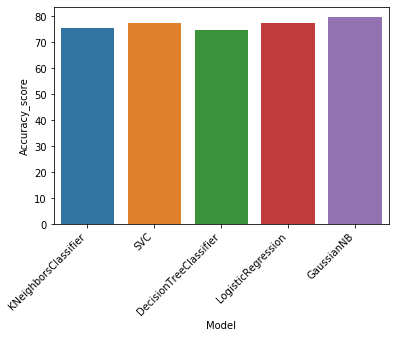

In [44]:
# visualizing all  results obtained
sns.barplot(x="Model",y="Accuracy_score",data=result)
plt.xticks(rotation=45,ha="right")

Above Bar plot suggest that GaussianNB has outperformed with an accuracy of 79.67 and cross val score of 79.32

In [45]:
## Using GridSearchCV to find out the best parameters of the model
parameters={"n_neighbors":range(1,20)}
KNN = KNeighborsClassifier()
clf=GridSearchCV(KNN,parameters,scoring="accuracy",cv=5)
clf.fit(x,y)
print(clf.best_score_)
print(clf.best_params_)

0.8062108489937359
{'n_neighbors': 17}


In [46]:
# Fitting the model again with the best parameter obtained using GridSearchCV
knn=KNeighborsClassifier(n_neighbors=17)
knn.fit(x_train,y_train)
pre=knn.predict(x_test)
AS=accuracy_score(y_test,pre)
print(AS*100)

74.79674796747967


In [47]:
# finding out the best parameters of SVC model using GridSearchCV
parameters={"kernel":("linear","rbf","poly"),"C":[1,10]}
svc = SVC()
clf=GridSearchCV(svc,parameters,scoring="accuracy",cv=10)
clf.fit(x,y)
print(clf.best_score_)
print(clf.best_estimator_.kernel)
print(clf.best_params_)

0.8095716552088842
linear
{'C': 1, 'kernel': 'linear'}


In [48]:
# Fitting the model again with the best parameter obtained using GridSearchCV
svc=SVC(kernel="linear",C=1)
svc.fit(x_train,y_train)
pre=svc.predict(x_test)
AS=accuracy_score(y_test,pre)
print(AS*100)

77.23577235772358


In [49]:
# finding out the best parameters of DecisionTreeClassifier  model using GridSearchCV
parameters={"criterion":["gini","entropy"]}
DT = DecisionTreeClassifier()
clf=GridSearchCV(DT,parameters,scoring="accuracy",cv=5)
clf.fit(x,y)
print(clf.best_score_)
print(clf.best_params_)

0.6938824470211915
{'criterion': 'entropy'}


In [50]:
# Fitting the model again with the best parameter obtained using GridSearchCV
DT=DecisionTreeClassifier(criterion="entropy")
DT.fit(x_train,y_train)
pre=DT.predict(x_test)
AS=accuracy_score(y_test,pre)
print(AS*100)

72.35772357723577


In [51]:
# Lets check whether our results gets boosted or not by first finding best parameters of GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
gbr=GradientBoostingClassifier()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters,scoring="accuracy",cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.001, 'n_estimators': 500}

In [63]:
# Fitting the model again with the best parameter obtained using GridSearchCV
gbr=GradientBoostingClassifier(learning_rate=0.001,n_estimators=500)
gbr.fit(x_train,y_train)
pre=gbr.predict(x_test)
AS=accuracy_score(y_test,pre)
print(AS*100)

76.42276422764228


In [53]:
# Now lets use ada boost classifier algorithm
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
paramters={"learning_rate":[0.001,0.01,0.01,1],"n_estimators":[10,100,500,1000]}
clf = GridSearchCV(ada,parameters,scoring="accuracy",cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.001, 'n_estimators': 10}

In [54]:
# Fitting the model again with the best parameter obtained using GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(learning_rate=0.001,n_estimators=10)
ada.fit(x_train,y_train)
pre=ada.predict(x_test)
AS=accuracy_score(y_test,pre)
print(AS*100)

77.23577235772358


In [64]:
# Now lets use RandomForestClassifier algorithm
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,criterion="gini")
rf.fit(x,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [56]:
# Fitting the model again with the best parameter obtained using GridSearchCV
model=rf
rf.fit(x_train,y_train)
pre=rf.predict(x_test)
AS=accuracy_score(y_test,pre)
print(AS*100)

78.04878048780488


In [ ]:
*GaussianNB has outperformed KNeighborsClassifier ,DecisionTreeClassifier,GradientBoostingClassifier,LogisticRegression,
 AdaBoostClassifier with an accuracy of 79.67 and cross val score of 79.33 appx.

In [57]:
# saving the best model obtained
from sklearn.externals import joblib

In [58]:
joblib.dump(GNB,"GNBFraudloan.obj")

['GNBFraudloan.obj']

In [59]:
model=joblib.load("GNBFraudloan.obj")

In [60]:
model.predict(x_test)

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1])